In [1]:
# %pip install matplotlib --quiet

In [2]:
import matplotlib.pyplot as plt
import random
import math
import os
import shutil
from IPython.display import display, clear_output

In [3]:
%matplotlib inline

In [4]:
shutil.rmtree('criacao_base', ignore_errors=True)
os.makedirs('criacao_base', exist_ok=True)

In [5]:
tamanho = (500, 500)
ponto_inicial_final = (0, 0), tamanho
raio_size = 25
visual_s = 5
qtd_centroides = 25
paciencia = 10

In [6]:
def inserir_circulo(ax, x, y, raio_size, visual_s, color_centro, color_ext):
    valores_adicionados = []
    valores_adicionados.append(ax.scatter(x, y, color=color_centro, s=visual_s))
    
    valor_baixo = (x, y - raio_size)
    valor_cima = (x, y + raio_size)
    valor_esquerda = (x - raio_size, y)
    valor_direita = (x + raio_size, y)
    posicoes = (valor_baixo, valor_cima, valor_esquerda, valor_direita)
    [valores_adicionados.append(ax.scatter(*posicao, color=color_ext, s=visual_s)) for posicao in posicoes]

    valores_adicionados.append(plt.Circle((x, y), raio_size, color=color_ext, fill=False))
    ax.add_patch(valores_adicionados[-1])

    posicao_circulo = (valor_baixo, valor_cima, valor_esquerda, valor_direita)
    return valores_adicionados, posicao_circulo

def salvar_e_exibir(figura, nome_arquivo):
    figura.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.1, dpi=150)
    clear_output(wait=True)
    display(figura)

def remover_valores_pintados(valores_pintados):
    for valor_adicionado in valores_pintados:
        valor_adicionado.remove()

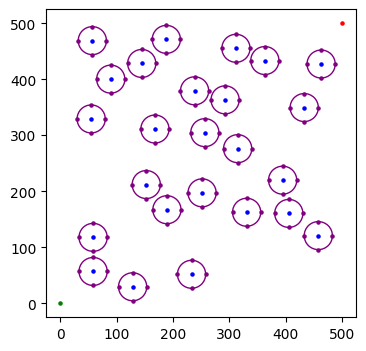

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(*ponto_inicial_final[0], color='green', s=visual_s)
ax.scatter(*ponto_inicial_final[1], color='red', s=visual_s);
plt.savefig('criacao_base/0_pontos_iniciais.png', bbox_inches='tight', pad_inches=0.1, dpi=150)

centroids = []
posicoes_centroides = []

interacao_atual = 0
paciencia_atual = 0

def verificar_distancia(x1, y1, x2, y2, raio_size) -> bool:
    distancia_x = x2 - x1
    distancia_y = y2 - y1
    distancia_euclidiana = math.sqrt(distancia_x ** 2 + distancia_y ** 2)
    return distancia_euclidiana < 2 * raio_size

while len(centroids) < qtd_centroides and paciencia_atual < paciencia:

    interacao_atual += 1
    paciencia_atual += 1
    
    x = random.uniform(raio_size, tamanho[0] - raio_size)
    y = random.uniform(raio_size, tamanho[1] - raio_size)

    if verificar_distancia(x, y, *ponto_inicial_final[0], raio_size):
        print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto inicial.')
    elif verificar_distancia(x, y, *ponto_inicial_final[1], raio_size):
        print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto final.')
    elif any(verificar_distancia(centroid[0], centroid[1], x, y, raio_size) for centroid in centroids):
        print(f'Ponto ({x}, {y}) está dentro da área de influência de um dos centroides já criados.')
        valores_pintados, _ = inserir_circulo(ax, x, y, raio_size, visual_s, 'red', 'orange')
        salvar_e_exibir(fig, f'criacao_base/{interacao_atual}_centroid_falha.png')
        remover_valores_pintados(valores_pintados)
    else:
        _, posicao_circulo = inserir_circulo(ax, x, y, raio_size, visual_s, 'blue', 'purple')
        salvar_e_exibir(fig, f'criacao_base/{interacao_atual}_centroid.png')
        
        centroids.append((x, y))
        posicoes_centroides.append(posicao_circulo)
        paciencia_atual = 0
    

plt.close(fig)

In [8]:
centroids

[(128.51829331732424, 29.491557383723872),
 (330.7982144492072, 162.52952343186067),
 (311.8504254354466, 455.324810190511),
 (152.74556105726944, 212.01356402850328),
 (89.73071033582731, 400.2630892911705),
 (314.8953382134525, 276.1223824161033),
 (58.41255237130531, 117.71127265421642),
 (233.0863712201265, 51.74683826667304),
 (55.01579746157641, 329.15549314466915),
 (188.35032436715787, 471.2653850063796),
 (58.42838739136605, 56.80967688010092),
 (189.38383106849784, 167.06060581665056),
 (394.66623034849925, 219.82802533672628),
 (457.9681558444843, 120.83183975423766),
 (144.69204384902167, 428.2545413325088),
 (57.0235367732543, 469.01793413585864),
 (462.9591461795402, 427.2364074721352),
 (168.11920630733147, 311.1580642307231),
 (238.4541238701367, 379.37975013960113),
 (363.14081669761964, 433.4829546485204),
 (432.9900214368273, 349.5084100288724),
 (292.63586314324044, 363.2425429990835),
 (405.59228643442066, 160.47189801386986),
 (251.75591109597607, 197.204963003307

In [9]:
posicoes_centroides

[((128.51829331732424, 4.4915573837238725),
  (128.51829331732424, 54.49155738372387),
  (103.51829331732424, 29.491557383723872),
  (153.51829331732424, 29.491557383723872)),
 ((330.7982144492072, 137.52952343186067),
  (330.7982144492072, 187.52952343186067),
  (305.7982144492072, 162.52952343186067),
  (355.7982144492072, 162.52952343186067)),
 ((311.8504254354466, 430.324810190511),
  (311.8504254354466, 480.324810190511),
  (286.8504254354466, 455.324810190511),
  (336.8504254354466, 455.324810190511)),
 ((152.74556105726944, 187.01356402850328),
  (152.74556105726944, 237.01356402850328),
  (127.74556105726944, 212.01356402850328),
  (177.74556105726944, 212.01356402850328)),
 ((89.73071033582731, 375.2630892911705),
  (89.73071033582731, 425.2630892911705),
  (64.73071033582731, 400.2630892911705),
  (114.73071033582731, 400.2630892911705)),
 ((314.8953382134525, 251.12238241610328),
  (314.8953382134525, 301.1223824161033),
  (289.8953382134525, 276.1223824161033),
  (339.89533